In [89]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import seaborn as sns
import random

In [90]:
def grafico_linha(*args, return_figure = False, legend_labels=['A','B','C']):
    from bokeh.plotting import figure, show
    from bokeh.io import output_notebook
    from bokeh.models import Range1d
    output_notebook()
    lista_cores = ['black', 'navy', 'red', 'green', 'orange', 'violet']
    p = figure(width=400, height=400,
               tools="hover,pan,box_zoom,wheel_zoom,zoom_in,zoom_out,reset,save")
    
    def set_range_limits(range_limits):
        if range_limits['lmin_x'] < range_limits['min_x']:
            range_limits['min_x'] = range_limits['lmin_x']
        if range_limits['lmax_x'] > range_limits['max_x']:
            range_limits['max_x'] = range_limits['lmax_x']
        if range_limits['lmin_y'] < range_limits['min_y']:
            range_limits['min_y'] = range_limits['lmin_y']
        if range_limits['lmax_y'] > range_limits['max_y']:
            range_limits['max_y'] = range_limits['lmax_y']
        return range_limits
    
    range_limits = {}
    
    if len(args)%2 == 0:
        counter_cores = 0
        for i in range(len(args)):
            if i%2 == 0:
                X = args[i]
                Y = args[i + 1]
                
                range_limits['lmin_x'], range_limits['lmax_x'] = min(X), max(X)
                range_limits['lmin_y'], range_limits['lmax_y'] = min(Y), max(Y)
                
                p.line(x=X, y=Y, color=lista_cores[counter_cores], alpha=0.8, legend_label=legend_labels[counter_cores])
                
                #definindo limites gráfico
                if i == 0:
                    range_limits['min_x'], range_limits['max_x'], range_limits['min_y'], range_limits['max_y'] = range_limits['lmin_x'], range_limits['lmax_x'], range_limits['lmin_y'], range_limits['lmax_y']
                else:
                    range_limits = set_range_limits(range_limits)
                
                p.x_range = Range1d(range_limits['min_x'] - (0.2*range_limits['max_x']), range_limits['max_x'] + (0.2*range_limits['max_x']))
                p.y_range = Range1d(range_limits['min_y'] - (0.2*range_limits['max_y']), range_limits['max_y'] + (0.2*range_limits['max_y']))
                
                counter_cores += 1
    
    else:
        print('\nERRO!')
        print('Insira como argumento da função os valores de X, Y e, caso houver, uma função algébrica.')
        print('EX 1: "grafico_pontos(x_vals, y_vals)"')
        print('EX 2: "grafico_pontos(x_vals, y_vals, função_reta)"')
        print('EX 3: "grafico_pontos(x_vals1, y_vals1, função_reta, x_vals2, y_vals2, funao_gaussiana)"')
        return
    
    if return_figure is True:
        return p
    else:
        show(p)

In [91]:
df_invest = pd.read_excel("atividade Martinez.xlsx")

In [92]:
df_invest

,cenario,ativo 1,ativo 2
0,1,1.36,1.29
1,2,1.50,1.63
2,3,1.85,2.00
3,4,1.64,1.68
4,5,1.32,1.34
5,6,1.61,1.72
6,7,1.00,0.89
7,8,1.06,1.03
8,9,1.08,1.11
9,10,1.38,1.38


In [96]:
matriz_cov = np.cov(df_invest["ativo 1"], df_invest["ativo 2"])

In [97]:
print(matriz_cov)

[[0.07994759 0.08813448]
 [0.08813448 0.10804655]]


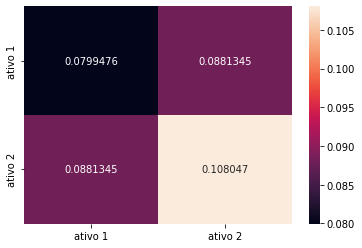

In [147]:
labs = ["ativo 1", "ativo 2"]

sns.heatmap(matriz_cov, annot=True, fmt='g', xticklabels=labs, yticklabels=labs)
plt.savefig("Matriz de covariância - Prob e est", dpi = 100, facecolor = 'white')
plt.show()

In [99]:
media_ativo_1 = df_invest["ativo 1"].mean()
media_ativo_2 = df_invest["ativo 2"].mean()

lista_medias = []
lista_variancias = []
lista_desvio = []
lista_razao = []
lista_a = []

for a in range(1, 1001):
    lista_a.append(a)

    b = 1000 - a
    
    media_total = a*media_ativo_1 + b*media_ativo_2
    
    lista_medias.append(media_total)
    
    matriz_coef = np.array([a, b])
    matriz_coef_trans = np.array([[a], [b]])
    
    matriz_passo = np.matmul(matriz_coef, matriz_cov)
    matriz_total = np.matmul(matriz_passo, matriz_coef_trans)
    variancia_total = matriz_total[0]
    desvio_total = (variancia_total)**(1/2)
    razao = media_total/desvio_total
    lista_variancias.append(variancia_total)
    lista_desvio.append(desvio_total)
    lista_razao.append(razao)

In [100]:
from sklearn import preprocessing
list = np.array(lista_desvio).reshape(-1,1)
scaler = preprocessing.MinMaxScaler()
lista_desvio_norm=scaler.fit_transform(list)

In [101]:
list = np.array(lista_medias).reshape(-1,1)
scaler = preprocessing.MinMaxScaler()
lista_medias_norm=scaler.fit_transform(list)

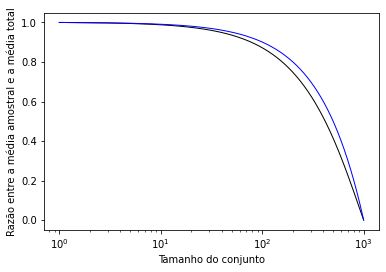

In [102]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
plt.plot(lista_a, lista_desvio_norm, linewidth = 1, color = 'black')
plt.plot(lista_a, lista_medias_norm, linewidth = 1, color = 'blue')
plt.xlabel('Tamanho do conjunto')
plt.ylabel('Razão entre a média amostral e a média total')
plt.xscale("log")
plt.savefig('Média amostral.png', dpi=100, format='png', facecolor='white')
plt.show()

In [103]:
grafico_linha(lista_a, lista_medias)

Loading BokehJS ...

In [104]:
grafico_linha(lista_a, lista_desvio)

Loading BokehJS ...

In [105]:
grafico_linha(lista_a, lista_razao)

Loading BokehJS ...

In [106]:
df_invest

,cenario,ativo 1,ativo 2
0,1,1.36,1.29
1,2,1.50,1.63
2,3,1.85,2.00
3,4,1.64,1.68
4,5,1.32,1.34
5,6,1.61,1.72
6,7,1.00,0.89
7,8,1.06,1.03
8,9,1.08,1.11
9,10,1.38,1.38


In [107]:
df_invest.loc[0]["ativo 1"]

1.36

In [108]:
ativo_1 = [*range(0, 101, 1)]
ativo_2 = [*range(100, -1, -1)]

In [109]:
dic_carteiras = {
    "investimento ativo 1": ativo_1,
    "investimento ativo 2": ativo_2
}
    

In [111]:
df_carteiras = pd.DataFrame.from_dict(dic_carteiras)

In [112]:
df_carteiras

,investimento ativo 1,investimento ativo 2
0,0,100
1,1,99
2,2,98
3,3,97
4,4,96
...,...,...
96,96,4
97,97,3
98,98,2
99,99,1


In [113]:
df_carteiras.head(5)

,investimento ativo 1,investimento ativo 2
0,0,100
1,1,99
2,2,98
3,3,97
4,4,96


In [114]:
df_invest.head(5)

,cenario,ativo 1,ativo 2
0,1,1.36,1.29
1,2,1.50,1.63
2,3,1.85,2.00
3,4,1.64,1.68
4,5,1.32,1.34


In [141]:
df_carteiras["Investimento"] = 0
df_carteiras["Retorno"] = 0

for i in range(2):
    cenario = random.randrange(0,30,1)
    ativo_1 = df_invest.loc[cenario]["ativo 1"]
    ativo_2 = df_invest.loc[cenario]["ativo 2"]
    
    df_carteiras["Investimento"] = df_carteiras["Investimento"] + 100
    df_carteiras["Retorno"] = df_carteiras["Retorno"] + df_carteiras["investimento ativo 1"]*ativo_1 + df_carteiras["investimento ativo 2"]*ativo_2
    #print(ativo_1, ativo_2)
    #print(df_carteiras)

In [142]:
df_carteiras

,investimento ativo 1,investimento ativo 2,Investimento,Retorno
0,0,100,200,359.00
1,1,99,200,358.91
2,2,98,200,358.82
3,3,97,200,358.73
4,4,96,200,358.64
...,...,...,...,...
96,96,4,200,350.36
97,97,3,200,350.27
98,98,2,200,350.18
99,99,1,200,350.09


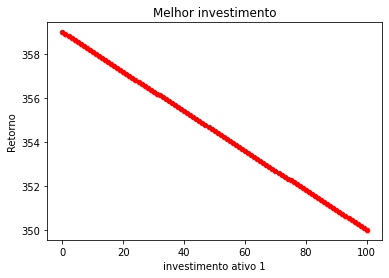

In [143]:
fig2 = plt.figure()
ax2 = fig2.add_subplot(111)
df_carteiras.plot('investimento ativo 1','Retorno',legend=True, ax=ax2, kind = 'scatter', color = 'red')
plt.title('Melhor investimento')
plt.xlabel('investimento ativo 1')
plt.ylabel('Retorno')
#plt.savefig('Gols e Público.png', dpi=100, format='png', facecolor='white')
plt.show()